In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# Preparation

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter


In [25]:
# Load Data
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [26]:
# Find Outliers based on IQR (Inter Quantile Range)

def find_outlier(df, n, features):
    outlier_index = []
    
    for feat in features:
        Q1 = np.percentile(df[feat], 25)
        Q3 = np.percentile(df[feat], 75)
        IQR = Q3 - Q1
        
        step = 1.5 * IQR
        outlier_col = df[(df[feat] < Q1 - step) | (df[feat] > Q3 + step )].index
        outlier_index.extend(outlier_col)
        
    outlier_index = Counter(outlier_index)
    multi_outliers = list(k for k, v in outlier_index.items() if v > n)
    
    return multi_outliers

outliers = find_outlier(train, 2, ["Age", "SibSp", "Parch", "Fare"])
len(outliers)

10

In [27]:
train.loc[outliers]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [28]:
train = train.drop(outliers, axis=0).reset_index(drop=True)

In [29]:
dataset = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
len(dataset)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


1299

In [30]:
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [31]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [32]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [33]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


# Feature Analysis

## Numerical Values

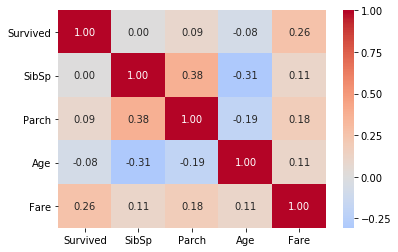

In [34]:
g = sns.heatmap(train[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0.0)

### SibSp

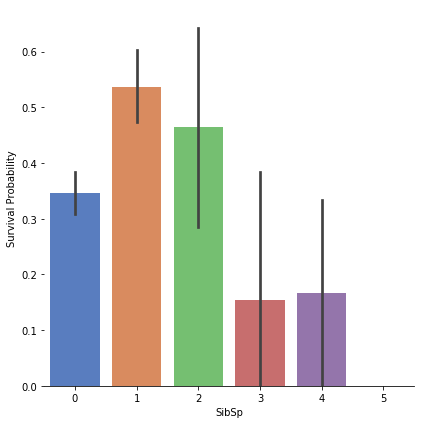

In [35]:
g = sns.factorplot(x="SibSp", y="Survived", data=train, kind="bar", size=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

*Observation:*

Single passenger or those who has one or two other persons have more chance to survive

### Parch

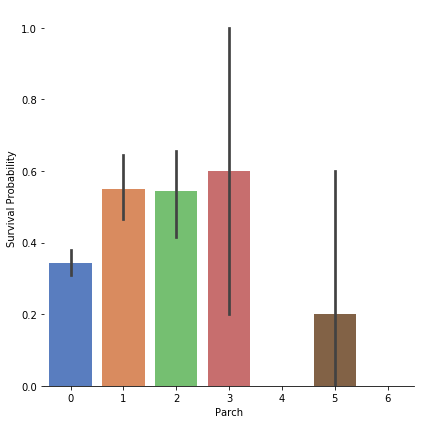

In [36]:
g = sns.factorplot(x="Parch", y="Survived", data=train, kind="bar", size=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

*Observation:*

* Small families have more chance to survive than Single or large families
* Parch = 3 has significant deviation

### Age

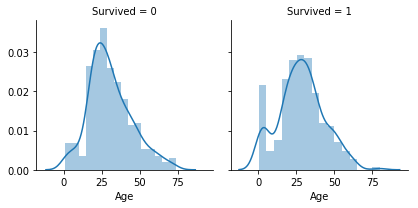

In [37]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

*Observations:*

* Age was not correlated with Survived but certain range seems to have correlation
* Very young passengers survived well
* Very old passengers did not survive much
* Young adult passengers did not survive much

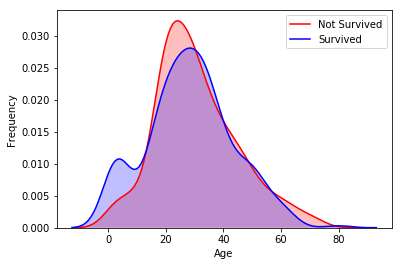

In [38]:
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade=True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax=g, color="Blue", shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived", "Survived"])

### Fare

In [39]:
# Fill the median value to the missing one record
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

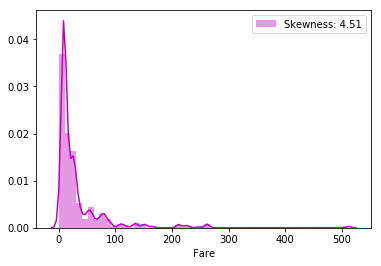

In [40]:
g = sns.distplot(dataset["Fare"], color="m", label="Skewness: %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

*Observation:*

* Fare is very skewed. Better to take log in this case.

In [41]:
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

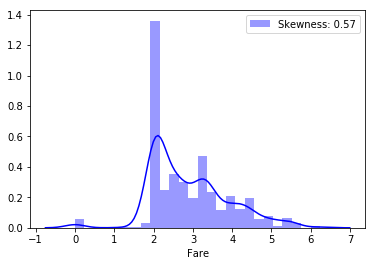

In [42]:
g = sns.distplot(dataset["Fare"], color="b", label="Skewness: %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

## Categorical Values

### Sex

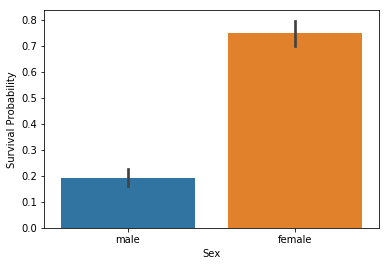

In [43]:
g = sns.barplot(x="Sex", y="Survived", data=train)
g = g.set_ylabel("Survival Probability")

In [44]:
train[["Sex", "Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


*Observation:*

* Clearly, female has much more chance to survive than male

### Pclass

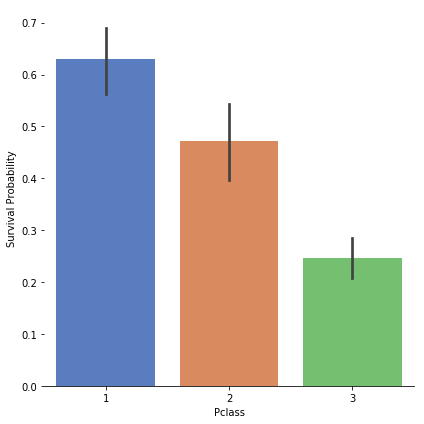

In [45]:
g = sns.factorplot(x="Pclass", y="Survived", data=train, kind="bar", size=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

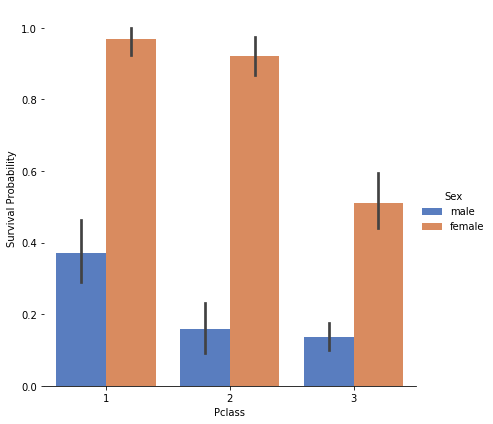

In [46]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train, kind="bar", size=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

*Observations:*

* Higher class passenger has more chance of survival
* This is consistent for both female and male

### Embarked

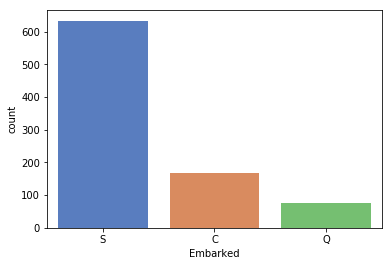

In [66]:
g = sns.countplot(x="Embarked", data=train, palette="muted")

In [68]:
dataset["Embarked"] = dataset["Embarked"].fillna("S")
dataset["Embarked"].isnull().sum()

0

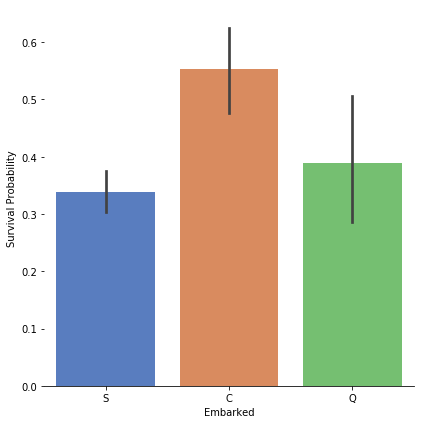

In [70]:
g = sns.factorplot(x="Embarked", y="Survived", data=train, size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

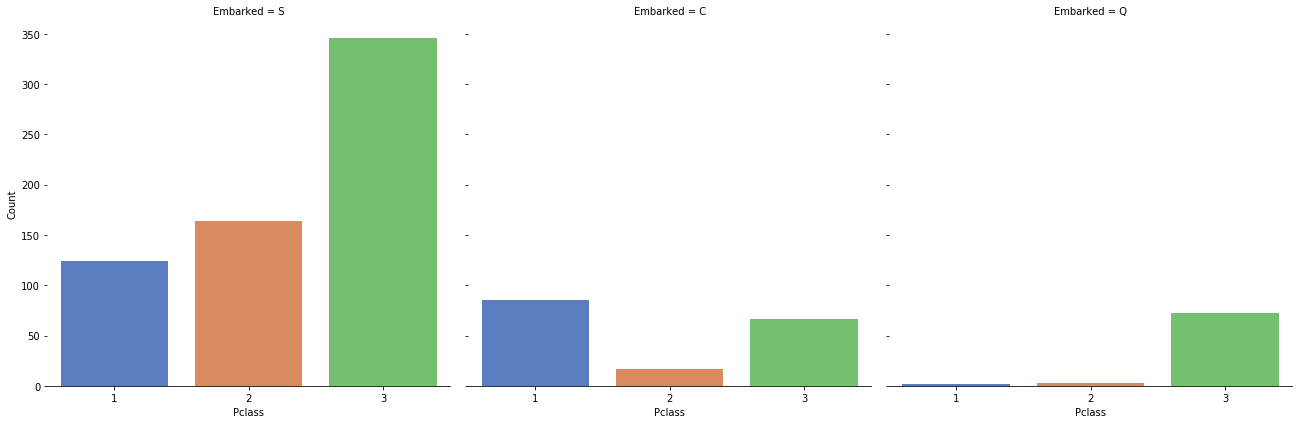

In [71]:
# Check if high survival rate for "C" is due to Passanger Class
g = sns.factorplot("Pclass", col="Embarked", data=train, size=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

*Observation:*

* Passengers embarked from "C" has higher survival rate but it seems to attribute to the fact that they are mostly 1st class passengers